# Time Series Forecasting of a SuperMarket Store for  2 years in future

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\ADMIN'

In [4]:
df= pd.read_csv(r'C:\Users\ADMIN\Downloads\Supermart.csv')

In [5]:
df.shape

(9994, 11)

In [6]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11/08/2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11/08/2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06/12/2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10/11/2016,South,2355,0.26,918.45,Tamil Nadu


In [7]:
##check for null values
df.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [9]:
#changing the Order Date Column datatype to datetime format
df['Order Date']= pd.to_datetime(df['Order Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [11]:
# Get unique city names
city_names = df['City'].unique()

In [12]:
print(city_names)

['Vellore' 'Krishnagiri' 'Perambalur' 'Dharmapuri' 'Ooty' 'Trichy'
 'Ramanadhapuram' 'Tirunelveli' 'Chennai' 'Karur' 'Namakkal' 'Dindigul'
 'Kanyakumari' 'Bodi' 'Tenkasi' 'Viluppuram' 'Madurai' 'Salem' 'Cumbum'
 'Nagercoil' 'Pudukottai' 'Theni' 'Coimbatore' 'Virudhunagar']


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

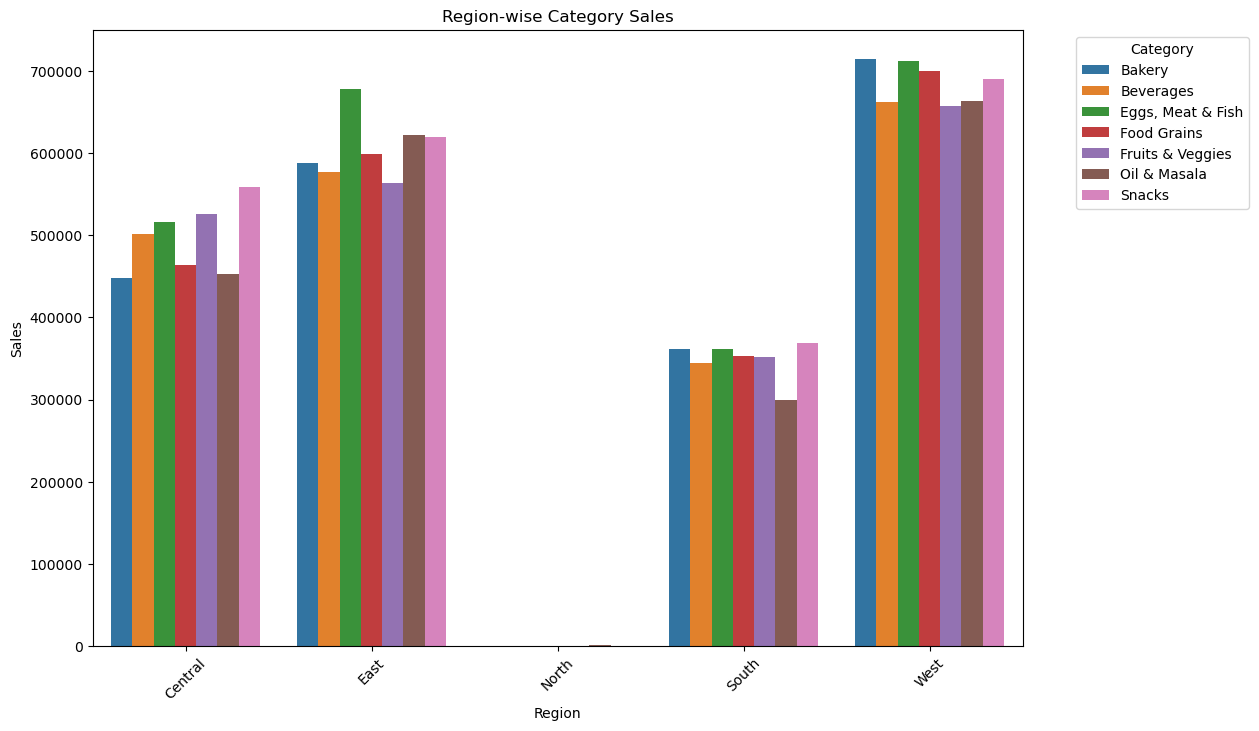

In [14]:
# Group data by region and category, and sum up the sales
region_category_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', hue='Category', data=region_category_sales)
plt.title('Region-wise Category Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Group data by category and sum up the sales
category_sales = df.groupby('Category')['Sales'].sum()

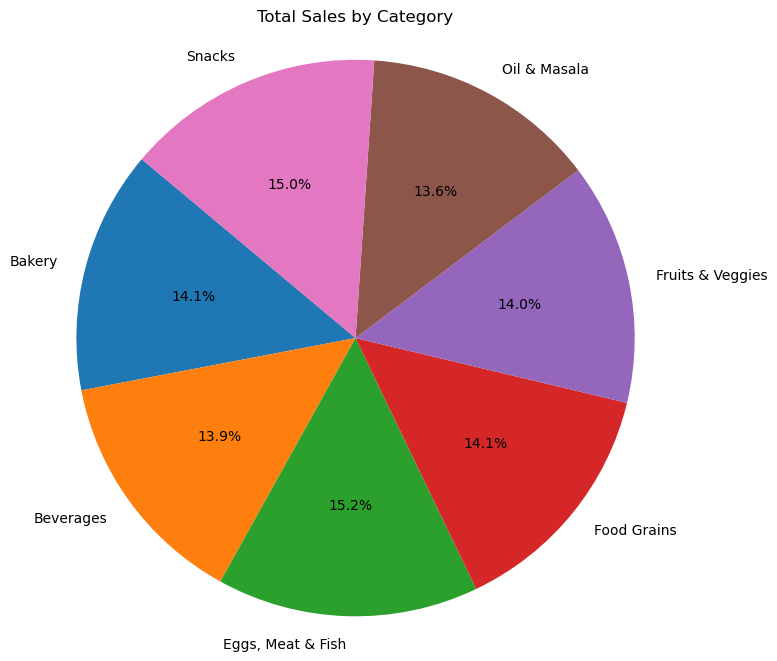

In [16]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [17]:
# Group data by category and sum up the profit
category_profit = df.groupby('Category')['Profit'].sum()

In [18]:
category_profit

Category
Bakery               528521.06
Beverages            525605.76
Eggs, Meat & Fish    567357.22
Food Grains          529162.64
Fruits & Veggies     530400.38
Oil & Masala         497895.29
Snacks               568178.85
Name: Profit, dtype: float64

In [19]:
# Find the category with the highest total profit
highest_profit_category = category_profit.idxmax()

# Print the highest profiting category
print("The highest profiting category is:", highest_profit_category)

The highest profiting category is: Snacks


In [20]:
#make a new dataset
data = df[['Order Date','Sales']]

In [21]:
data.head()

,Order Date,Sales
0,2017-11-08,1254
1,2017-11-08,749
2,2017-06-12,2360
3,2016-10-11,896
4,2016-10-11,2355


In [22]:
# Check for NaN or NA values
nan_values = data.isna().sum()
print("NaN or NA values:")
print(nan_values)

NaN or NA values:
Order Date    0
Sales         0
dtype: int64


In [23]:
data.set_index('Order Date',inplace=True)

In [24]:
data.head()

,Sales
Order Date,
2017-11-08,1254
2017-11-08,749
2017-06-12,2360
2016-10-11,896
2016-10-11,2355


In [25]:
data.describe()

,Sales
count,9994.000000
mean,1496.596158
std,577.559036
min,500.000000
25%,1000.000000
50%,1498.000000
75%,1994.750000
max,2500.000000


In [26]:
data.head()

,Sales
Order Date,
2017-11-08,1254
2017-11-08,749
2017-06-12,2360
2016-10-11,896
2016-10-11,2355


In [27]:
data.dropna(inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5824\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [28]:
# Resample data to monthly frequency
data_monthly = data.resample('M').sum()

In [29]:
data_monthly.head()

,Sales
Order Date,
2015-01-31,122497
2015-02-28,66030
2015-03-31,247156
2015-04-30,203258
2015-05-31,164263


<AxesSubplot:xlabel='Order Date'>

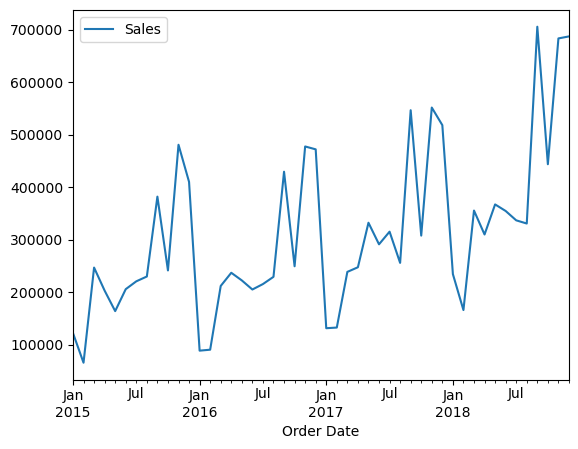

In [30]:
data_monthly.plot()

### Timeseries Analysis using ExponentialSmoothing since we can observe seasonality in data from above

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


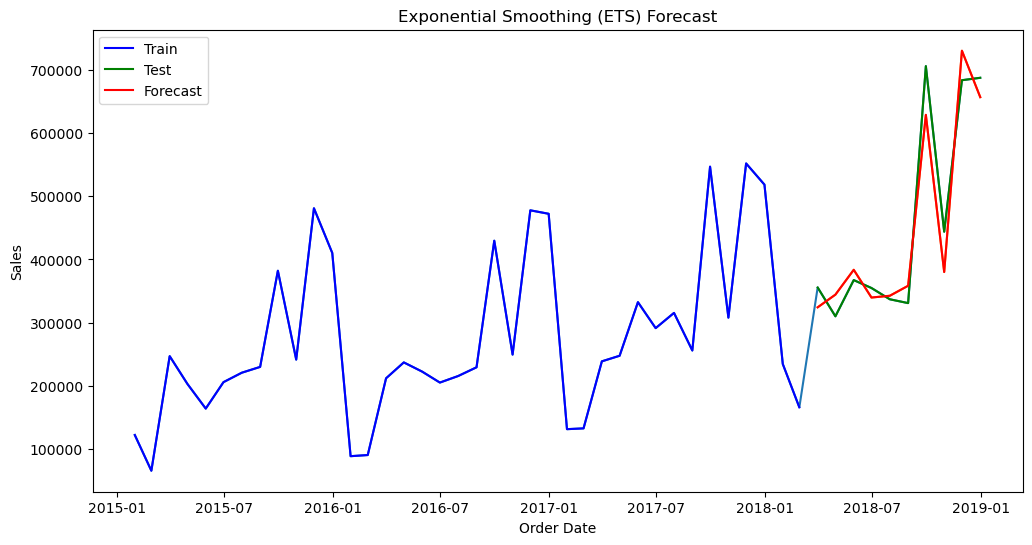

In [31]:
## forecasting using train and test data for current dataset
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Splitting the data into train and test sets
train_size = int(len(data_monthly) * 0.80)
train_data, test_data = data_monthly.iloc[:train_size], data_monthly.iloc[train_size:]

# Fitting the ETS model
ets_model = ExponentialSmoothing(train_data, seasonal='multiplicative', seasonal_periods=12).fit()

# Forecasting
forecast = ets_model.forecast(len(test_data))
# Concatenate train, test, and forecasted data
combined_data = pd.concat([train_data, test_data, forecast])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data)
plt.plot(train_data.index, train_data, label='Train', color='blue')
plt.plot(test_data.index, test_data, label='Test', color='green')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing (ETS) Forecast')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

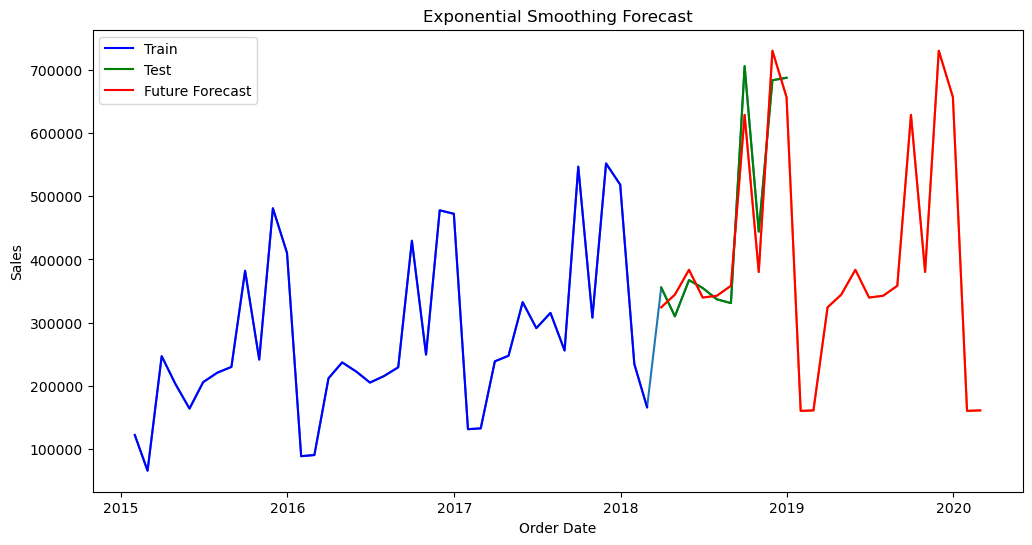

In [32]:
# Forecasting for 1 year into the future (24 steps ahead)
forecast_fut = ets_model.forecast(steps=24)

# Concatenate train, test, and forecasted data
combined_data1 = pd.concat([train_data, test_data, forecast_fut])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(combined_data1.index, combined_data1)
plt.plot(train_data.index, train_data, label='Train', color='blue')
plt.plot(test_data.index, test_data, label='Test', color='green')
plt.plot(forecast_fut.index, forecast_fut, label='Future Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()